In [12]:
from typing import *

# From strivers sheet

### Ninja’s Training (DP 7)

Problem Statement: A Ninja has an ‘N’ Day training schedule. He has to perform one of these three activities (Running, Fighting Practice, or Learning New Moves) each day. There are merit points associated with performing an activity each day. The same activity can’t be performed on two consecutive days. We need to find the maximum merit points the ninja can attain in N Days.

We are given a 2D Array POINTS of size ‘N*3’ which tells us the merit point of specific activity on that particular day. Our task is to calculate the maximum number of merit points that the ninja can earn.

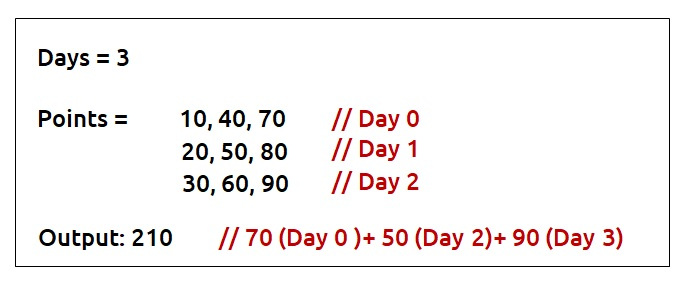

In [14]:
### thinking in terms of indices, day -> denote the day, limit -> denotes the two day limit.
def ninjas_training(points):

    def worker(day, prev_activity):

        if day == len(points):
            return 0

        max_points = 0

        for i in range(3):
            if prev_activity == i: continue

            max_points = max(max_points, points[day][i] + worker(day+1, i))

        return max_points

    return worker(0, -1)

###adding memoization
def ninjaTraining(n: int, points: List[List[int]]) -> int:

    ###adding memoization
    dp = [[-1 for i in range(3)] for j in range(n)]

    def worker(day, prev_activity, dp):

        if day == len(points):
            return 0

        if dp[day][prev_activity] != -1:
            return dp[day][prev_activity]

        max_points = 0

        for i in range(3):
            if prev_activity == i: continue

            max_points = max(max_points, points[day][i] + worker(day+1, i, dp))

        dp[day][prev_activity] = max_points

        return max_points

    return worker(0, -1, dp)

points = [[10,40,70], [20,50,80], [30,60,90]]

print('recursive brute force :', ninjas_training(points))
print('Using memoization : ', ninjaTraining(n = len(points), points=points))

210

In [16]:
#####unable to create a tabular approach.
#### index is correct, recursion correction is correct.
#### for top-down : start from n-1 -> 0 for days, activity 3 -> 0
#### initializing the base case is required.

def ninjaTraining(n: int, points: List[List[int]]) -> int:

    ###adding memoization
    dp = [[-1 for i in range(4)] for j in range(n)]

    def worker(day, prev_activity, dp):

        if day == 0:
            max_points = 0
            for i in range(3):
                if prev_activity == i: continue
                max_points = max(max_points, points[0][i])
            dp[day][prev_activity] = max_points
            return max_points

        if dp[day][prev_activity] != -1:
            return dp[day][prev_activity]

        max_points = 0

        for i in range(3):
            if prev_activity == i: continue

            max_points = max(max_points, points[day][i] + worker(day-1, i, dp))

        dp[day][prev_activity] = max_points

        return max_points

    return worker(n-1, 3, dp)

print('Using memoization : ', ninjaTraining(n = len(points), points=points))


Using memoization :  210


In [27]:
####tabulation

def ninjaTraining(n: int, points: List[List[int]]) -> int:

    ###implementating tabulation
    dp = [[0 for i in range(4)] for j in range(n+1)]

    dp[0][0] = max(points[0][1], points[0][2])
    dp[0][1] = max(points[0][2], points[0][0])
    dp[0][2] = max(points[0][1], points[0][0])
    dp[0][3] = max(points[0])

    for day in range(1, n):

        for prev_activity in range(4):

            dp[day][prev_activity] = 0

            for i in range(3):

                if i == prev_activity: continue

                dp[day][prev_activity] = max(dp[day][prev_activity], points[day][i] + dp[day-1][i])

    # print(dp)
    return dp[n-1][3]


points = [[10,40,70], [20,50,80], [30,60,90]]
print('Using tabulation : ', ninjaTraining(n = len(points), points=points))

Using tabulation :  210


In [28]:
####tabulation, space optimization

def ninjaTraining(n: int, points: List[List[int]]) -> int:

    ###adding memoization
    prev = [0 for i in range(4)]

    prev[0] = max(points[0][1], points[0][2])
    prev[1] = max(points[0][2], points[0][0])
    prev[2] = max(points[0][1], points[0][0])
    prev[3] = max(points[0])

    for day in range(1, n):

        curr = [0 for i in range(4)]

        for prev_activity in range(4):

            curr[prev_activity] = 0

            for i in range(3):

                if i == prev_activity: continue

                curr[prev_activity] = max(curr[prev_activity], points[day][i] + prev[i])

        prev = curr

    return prev[3]


points = [[10,40,70], [20,50,80], [30,60,90]]
print('Using tabulation : ', ninjaTraining(n = len(points), points=points))

Using tabulation :  210


### Grid Unique Paths : DP on Grids (DP8)

In this article, we will solve the most asked coding interview problem: Grid Unique Paths

Given two values M and N, which represent a matrix[M][N]. We need to find the total unique paths from the top-left cell (matrix[0][0]) to the rightmost cell (matrix[M-1][N-1]).

At any cell we are allowed to move in only two directions:- bottom and right.

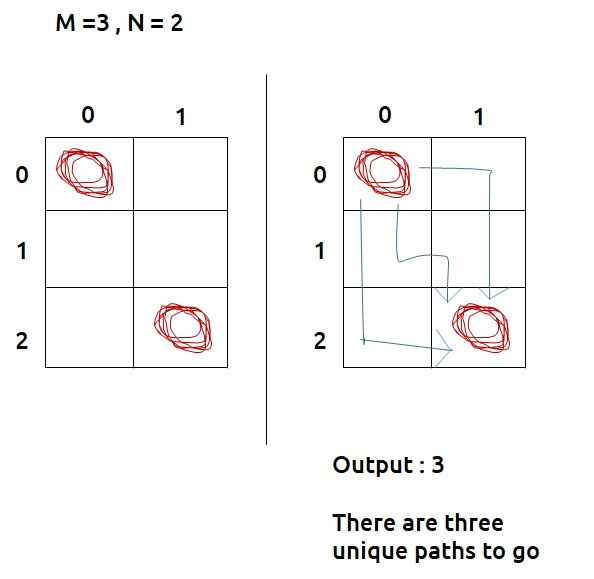

In [72]:
#### recursive

def grid_unique_paths(n, m):

    def worker(i, j):

        if i >= n or i < 0 or j >= m or j < 0: return 0

        if i == n-1 and j == m-1: return 1

        ###bottom
        down = worker(i+1, j)
        ###right
        right = worker(i, j+1)

        return down + right

    return worker(0, 0)

def uniquePaths_memoization(n, m):

	dp = [[-1 for i in range(m)] for j in range(n)]

	def worker(i, j, dp):

		if i >= n or i < 0 or j >= m or j < 0: return 0

		if i == n-1 and j == m-1: return 1

		if dp[i][j] != -1: return dp[i][j]

		###bottom
		down = worker(i+1, j, dp)
		###right
		right = worker(i, j+1, dp)

		dp[i][j] = down + right

		return dp[i][j]

	return worker(0, 0, dp)

def uniquePaths_tabulation(n, m):

    dp = [[0 for i in range(m)] for j in range(n)]

    dp[0][0] = 1

    for i in range(n):

        for j in range(m):

            if i == 0 and j == 0:
                dp[i][j] = 1
                continue

            down, right = 0, 0

            if i - 1 >= 0:
                down = dp[i-1][j]

            if j - 1 >= 0:
                right = dp[i][j-1]

            dp[i][j] = down + right

    # print(dp)

    return dp[n-1][m-1]

def uniquePaths_tabulation_so(n, m):

    prev = [0 for i in range(m)]

    for i in range(n):

        temp = [0 for i in range(m)]

        for j in range(m):

            if i == 0 and j == 0:
                temp[j] = 1
                continue

            down, right = 0, 0

            if i - 1 >= 0:
                down = prev[j]

            if j - 1 >= 0:
                right = temp[j-1]

            temp[j] = down + right

        prev = temp

    return prev[m-1]

print(grid_unique_paths(3, 2))
print(uniquePaths_memoization(3, 2))
print(uniquePaths_tabulation(3, 2))
print(uniquePaths_tabulation_so(3, 2))

3
3
3
3


### Grid Unique Paths 2 (DP 9)

Problem Description: 

We are given an “N*M” Maze. The maze contains some obstacles. A cell is ‘blockage’ in the maze if its value is -1. 0 represents non-blockage. There is no path possible through a blocked cell.

We need to count the total number of unique paths from the top-left corner of the maze to the bottom-right corner. At every cell, we can move either down or towards the right.

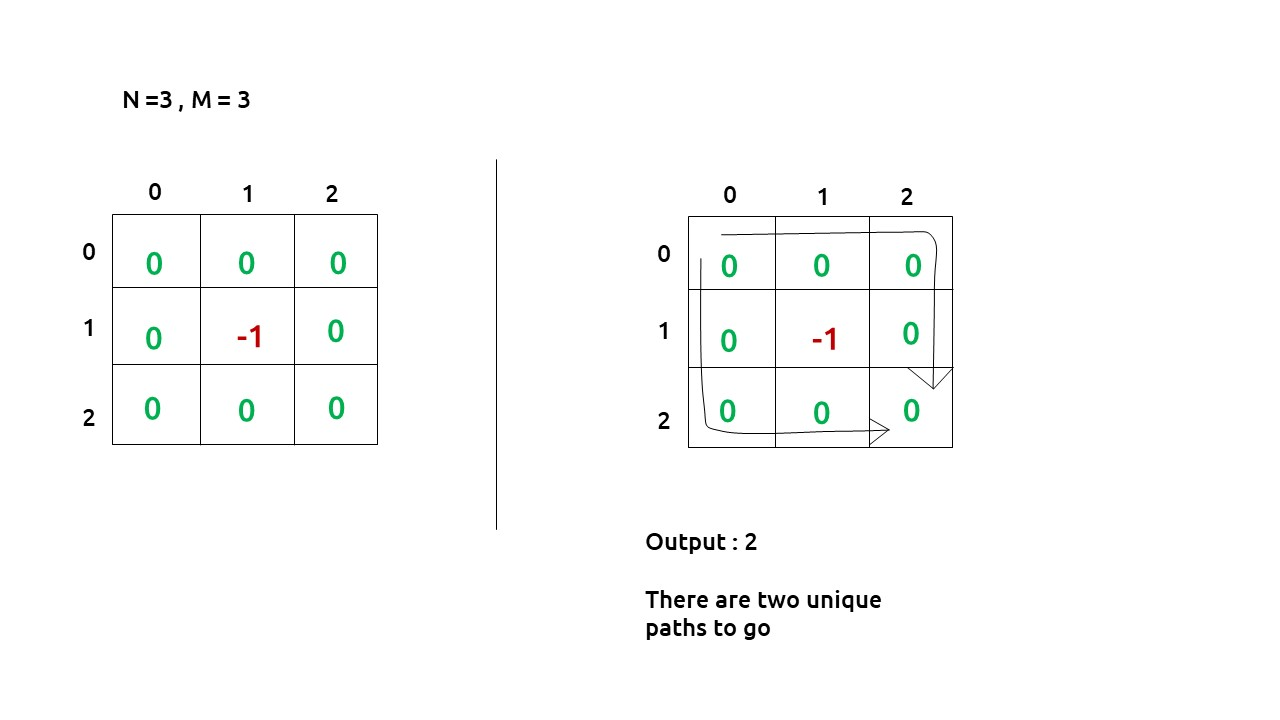

In [ ]:
def mazeObstacles(n, m, mat):

    dp = [[-1 for i in range(m)] for j in range(n)]

    def worker(i, j, dp):

        if i >= n or i < 0 or j >= m or j < 0: return 0

        if mat[i][j] == -1: return 0

        if i == n-1 and j == m-1: return 1

        if dp[i][j] != -1: return dp[i][j]

        ###bottom
        down = worker(i+1, j, dp)
        ###right
        right = worker(i, j+1, dp)

        dp[i][j] = (down + right) % (10 ** 9 + 7)

        return dp[i][j]

    return worker(0, 0, dp)


def mazeObstacles(n, m, mat):

    MOD = 10 ** 9 + 7
    prev = [0 for i in range(m)]

    for i in range(n):

        temp = [0 for i in range(m)]

        for j in range(m):

            if mat[i][j] == -1: continue

            if i == 0 and j == 0:
                temp[j] = 1
                continue

            down, right = 0, 0

            if i - 1 >= 0:
                down = prev[j]

            if j - 1 >= 0:
                right = temp[j-1]

            temp[j] = (down + right) % MOD

        prev = temp

    return prev[m-1]

### Minimum Path Sum In a Grid (DP 10)

In this article, we will solve the most asked coding interview problem: Minimum Path Sum In a Grid.

Problem Link: Minimum Path Sum in A Grid

Problem Description: 

We are given an “N*M” matrix of integers. We need to find a path from the top-left corner to the bottom-right corner of the matrix, such that there is a minimum cost past that we select.

At every cell, we can move in only two directions: right and bottom. The cost of a path is given as the sum of values of cells of the given matrix.

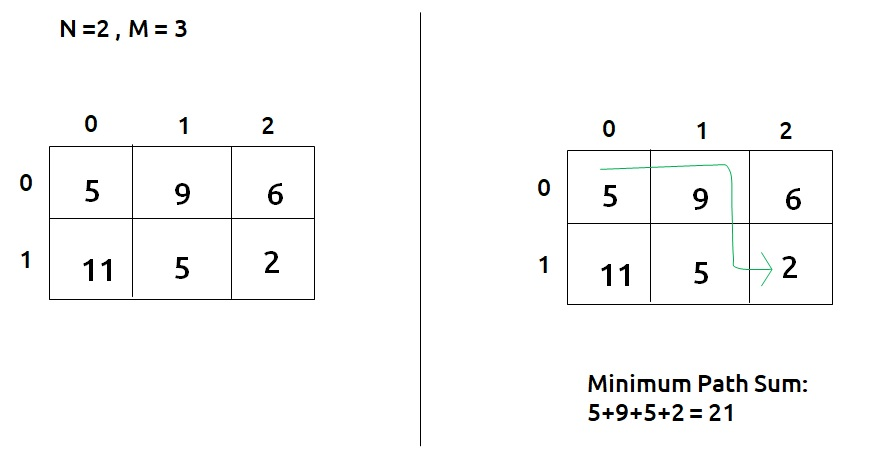

In [ ]:
def minSumPath(grid):

    n = len(grid)
    m = len(grid[0])
    dp = [[-1 for i in range(m)] for j in range(n)]

    def worker(i, j, dp):

        if i >= n or i < 0 or j >= m or j < 0: return 10**9

        if i == n - 1 and j == m-1: return grid[i][j]

        if dp[i][j] != -1: return dp[i][j]

        ###bottom
        down =  grid[i][j] + worker(i+1, j, dp)
        ###right
        right =  grid[i][j] + worker(i, j+1, dp)

        dp[i][j] = min(down, right)

        return dp[i][j]

    return worker(0, 0, dp)

def minSumPath(grid):

    n = len(grid)
    m = len(grid[0])

    MAX = 10 ** 9 + 7
    prev = [0 for i in range(m)]

    for i in range(n):

        temp = [0 for i in range(m)]

        for j in range(m):

            if i == 0 and j == 0: 
                temp[j] = grid[i][j]
                continue

            down, right = MAX, MAX

            if i - 1 >= 0:
                down = prev[j]

            if j - 1 >= 0:
                right = temp[j-1]

            temp[j] = grid[i][j] + min(down, right)

        prev = temp

    return prev[m-1]

### Minimum path sum in Triangular Grid (DP 11)

We are given a Triangular matrix. We need to find the minimum path sum from the first row to the last row.

At every cell we can move in only two directions: either to the bottom cell (↓) or to the bottom-right cell(↘)

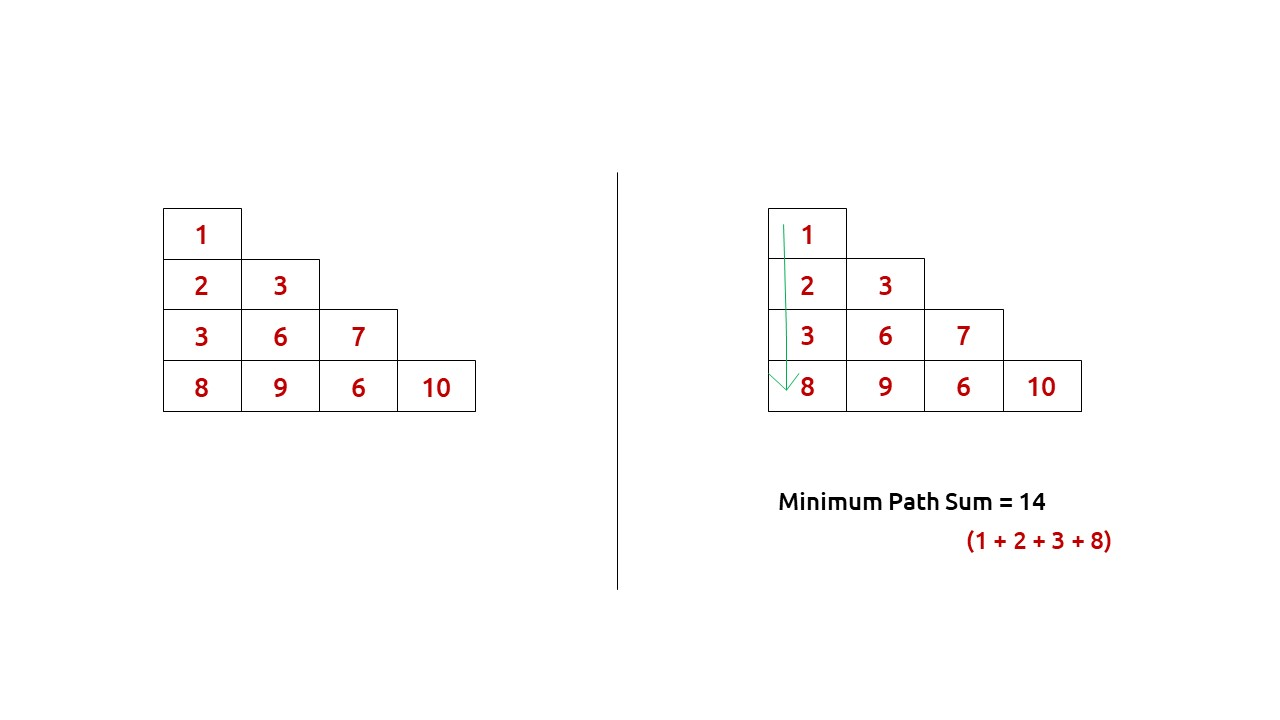

In [ ]:
def minimumPathSum(triangle, n):

    dp = [[-1 for i in range(n)] for j in range(n)]

    def worker(i, j, dp):

        if i >= n: return 10 ** 9

        if i == n - 1: return triangle[i][j]

        if dp[i][j] != -1: return dp[i][j]

        down = worker(i+1, j, dp)
        bottom_down = worker(i+1, j+1, dp)

        dp[i][j] =  triangle[i][j] + min(down, bottom_down)

        return dp[i][j]

    return worker(0, 0, dp)

### Minimum/Maximum Falling Path Sum (DP-12)

Problem Description:

We are given an ‘N*M’ matrix. We need to find the maximum path sum from any cell of the first row to any cell of the last row.

At every cell we can move in three directions: to the bottom cell (↓), to the bottom-right cell(↘), or to the bottom-left cell(↙).

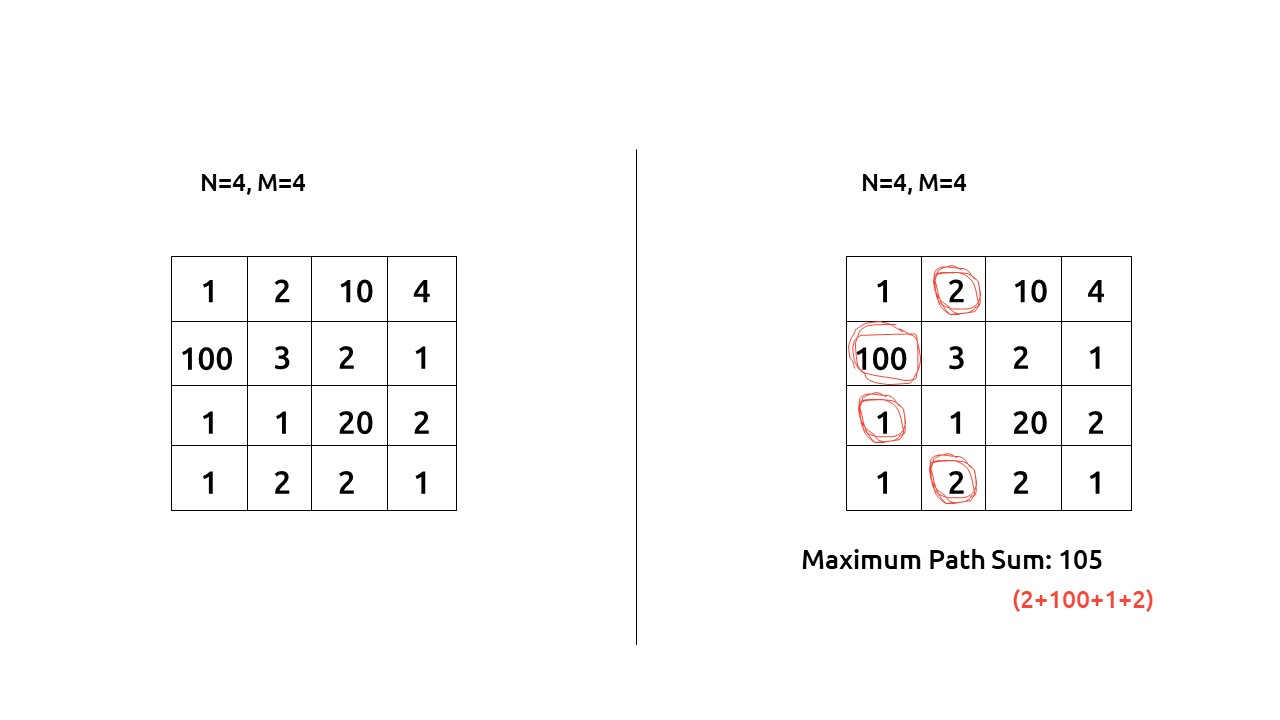

In [ ]:
from os import *
from sys import *
from collections import *
from math import *

from sys import stdin, setrecursionlimit
setrecursionlimit(10**7)


def getMaxPathSum(matrix):

    n = len(matrix)
    m = len(matrix[0])
    MAX = 10 ** 7

    def worker(i, j, dp):

        if i < 0 or i >= n or j < 0 or j >= m: return -MAX

        if i == n - 1: return matrix[i][j]

        if dp[i][j] != -1: return dp[i][j]

        down = matrix[i][j] + worker(i+1, j, dp)
        down_left = matrix[i][j] + worker(i+1, j-1, dp)
        down_right = matrix[i][j] + worker(i+1, j+1, dp)

        dp[i][j] = max(down, down_left, down_right)

        return dp[i][j]

    dp = [[-1 for i in range(m)] for i in range(n)]
    max_ans = -MAX
    for i in range(m):
        ans = worker(0, i, dp)
        max_ans = max(max_ans, ans)

    return max_ans




#   taking inpit using fast I/O
def takeInput() :
    n_x = stdin.readline().strip().split(" ")
    n = int(n_x[0].strip())
    m = int(n_x[1].strip())

    matrix=[list(map(int, stdin.readline().strip().split(" "))) for row in range(n)]

    return matrix, n, m


#   main
T = int(input())
while (T > 0):
    T -= 1
    matrix, n, m = takeInput()
    print(getMaxPathSum(matrix))


### 3-d DP : Ninja and his friends (DP-13)

Problem Description: 

We are given an ‘N*M’ matrix. Every cell of the matrix has some chocolates on it, mat[i][j] gives us the number of chocolates. We have two friends ‘Alice’ and ‘Bob’. initially, Alice is standing on the cell(0,0) and Bob is standing on the cell(0, M-1). Both of them can move only to the cells below them in these three directions: to the bottom cell (↓), to the bottom-right cell(↘), or to the bottom-left cell(↙).

When Alica and Bob visit a cell, they take all the chocolates from that cell with them. It can happen that they visit the same cell, in that case, the chocolates need to be considered only once.

They cannot go out of the boundary of the given matrix, we need to return the maximum number of chocolates that Bob and Alice can together collect.

In [ ]:
from os import *
from sys import *
from collections import *
from math import *

from typing import List


def maximumChocolates(n: int, m: int, grid: List[List[int]]) -> int:

    dp = [[[-1 for i in range(m)] for i in range(m)] for i in range(n)]

    def worker(i, j1, j2, dp):

        if j1 < 0 or j1 >= m or j2 < 0 or j2 >= m: return -10 ** 3

        if i == n - 1:
            ###if both are on same cell consider only one. eg. j1
            if j1 == j2:
                return grid[i][j1]
            else:
                return grid[i][j1] + grid[i][j2]

        if dp[i][j1][j2] != -1: return dp[i][j1][j2]

        max_ans = -1

        ###there are -1 total choices
        for d1 in [-1, 0, 1]:
            for d2 in [-1, 0, 1]:

                res = worker(i+1, j1 + d1, j2 + d2, dp)

                if j1 == j2:
                    res += grid[i][j1]
                else:
                    res += grid[i][j1] + grid[i][j2]

                max_ans = max(max_ans, res)

        dp[i][j1][j2] = max_ans

        return max_ans

    return worker(0, 0, m-1, dp)

